In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
houses = pd.read_table('AmesHousing_1.txt')
%matplotlib inline

C:\Users\pragg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


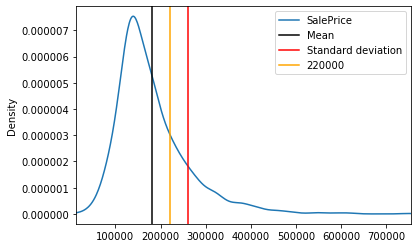

In [9]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),houses['SalePrice'].max()))
mean = houses['SalePrice'].mean()
stdev = houses['SalePrice'].std(ddof=0)
plt.axvline(mean, color = 'black', label = 'Mean')
plt.axvline(mean+stdev, color = 'red',label='Standard deviation')
plt.axvline(220000, color='orange',label='220000')
plt.legend()

In [10]:
st_devs_away = (220000-mean)/stdev

In [11]:
st_devs_away

0.4908280788718362

In [15]:
def zscore(val,arr):
    mean = sum(arr)/len(arr)
    stdev=np.std(arr, ddof=1)
    distance = val-mean
    z_score = distance/stdev
    return z_score

In [16]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

In [17]:
min_z=zscore(min_val,houses['SalePrice'])
max_z=zscore(max_val,houses['SalePrice'])
mean_z=zscore(mean_val,houses['SalePrice'])

In [18]:
print(min_z, max_z, mean_z)

-2.103066920309695 7.187729557860895 0.0


## Locating values in different distributions
From the 5 neighbourhoods, we are trying to understand where $200,000 is closest to the mean and therefore the best investment in a relative sense. We do this by finding the z-score and picking the one closest to 0

In [21]:
houses[houses['Neighborhood']=='NAmes']['SalePrice'].std(ddof=1)

31882.707228865536

In [22]:
nhoods=['NAmes','CollgCr','OldTown','Edwards','Somerst']
z_scores={}
for x in nhoods:
    neighborhood=houses[houses['Neighborhood']==x]
    z_scores[x]=zscore(200000,neighborhood['SalePrice'])

In [23]:
z_scores

{'NAmes': 1.722019705502292,
 'CollgCr': -0.03328116293550407,
 'OldTown': 1.714709537757288,
 'Edwards': 1.4398508297188277,
 'Somerst': -0.517212269518196}

## Standard distribution
Alright so now we know how to calculate z-scores. If we go one step further and plot z-scores on a histogram, we'll se that it looks exactly like the population histogram because it preserves the relative distance of each point from the other.

If we look for the mean and standard deviation of the collection of z-scores, we'll find that mean nearly = 0 and standard deviation nearly equals 1. If you plot the distance between z-scores to mean, you will get a standardized distribution

### Why is this ever useful
To compare across different scales and units. If you standardize the distributions, you will be comparing z-scores on a relative scale. z-scores closer to 0 are more similar to the average.

